### Counting letter bigrams in several languages

In [1]:
%matplotlib inline
from collections import defaultdict
from urllib.request import urlopen
import string
import numpy as np
import matplotlib.pyplot as plt

# Turkish
#"ç","ı","ğ","ö","ş","ü",'â'
# German
#"ä","ß","ö","ü"
# French
#"ù","û","ô","â","à","ç","é","è","ê","ë","î","ï","æ"
tr_alphabet = ['•','a','b','c','ç','d','e','f',
                'g','ğ','h','ı','i','j','k','l',
                'm','n','o','ö','p','q','r','s','ş',
                't','u','ü','w','v','x','y','z']
# Union of Frequent letters in French, Turkish, German and English
my_alphabet = ['•','a','â','ä',"à","æ",'b','c','ç','d','e',"é","è","ê","ë",'f',
                'g','ğ','h','ı','i',"î",'ï','j','k','l',
                'm','n','o','œ',"ô",'ö','p','q','r','s','ş',
                't','u','ù',"û",'ü','w','v','x','y','z','ß']
# Only ascii characters
ascii_alphabet = list('•'+string.ascii_lowercase)
# Reduction table from my alphabet to ascii
my2ascii_table = {
    ord('â'):"a",
    ord('ä'):"ae",
    ord("à"):"a",
    ord("æ"):"ae",
    ord('ç'):"c",
    ord("é"):"e",
    ord("è"):"e",
    ord("ê"):"e",
    ord("ë"):"e",
    ord('ğ'):"g",
    ord('ı'):"i",
    ord("î"):"i",
    ord('ï'):"i",
    ord('œ'):"oe",
    ord("ô"):"o",
    ord('ö'):"o",
    ord('ş'):"s",
    ord('ù'):"u",
    ord("û"):"u",
    ord('ü'):"u",
    ord('ß'):"ss"
    }
# Reduction table from my alphabet to frequent letters in turkish text
my2tr_table = {
    ord('â'):"a",
    ord('ä'):"ae",
    ord("à"):"a",
    ord("æ"):"ae",
    ord("é"):"e",
    ord("è"):"e",
    ord("ê"):"e",
    ord("ë"):"e",
    ord("î"):"i",
    ord('ï'):"i",
    ord('œ'):"oe",
    ord("ô"):"o",
    ord('ù'):"u",
    ord("û"):"u",
    ord('ß'):"ss"
    }


def count_transitions(fpp, alphabet, tab):

    #ignore punctuation
    tb = str.maketrans(".\t\n\r ","•••••", '0123456789!"\'#$%&()*,-/:;<=>?@[\\]^_`{|}~+')
    #replace other unicode characters with a bullet (alt-8)
    tbu = {
        ord("İ"):'i',
        ord(u"»"):'•', 
        ord(u"«"):'•', 
        ord(u"°"):'•', 
        ord(u"…"):'•',
        ord(u"”"):'•',
        ord(u"’"):'•',
        ord(u"“"):'•',
        ord(u"\ufeff"):'•',
        775: None}

    # Character pairs 
    D = defaultdict(int)

    for line in fpp:
        s = line.decode('utf-8').translate(tb).lower()
        s = s.translate(tbu)
        s = s.translate(tab)
        #print(s)

        if len(s)>1:
            for i in range(len(s)-1):
                D[s[i:i+2]]+=1
    
    M = len(alphabet)
    a2i = {v: k for k,v in enumerate(alphabet)}
    DD = np.zeros((M,M))

    ky = sorted(D.keys())
    for k in D.keys():
        i = a2i[k[0]]
        j = a2i[k[1]]
        DD[i,j] = D[k]

    return D, DD, alphabet

## Count and display occurences of letters in text

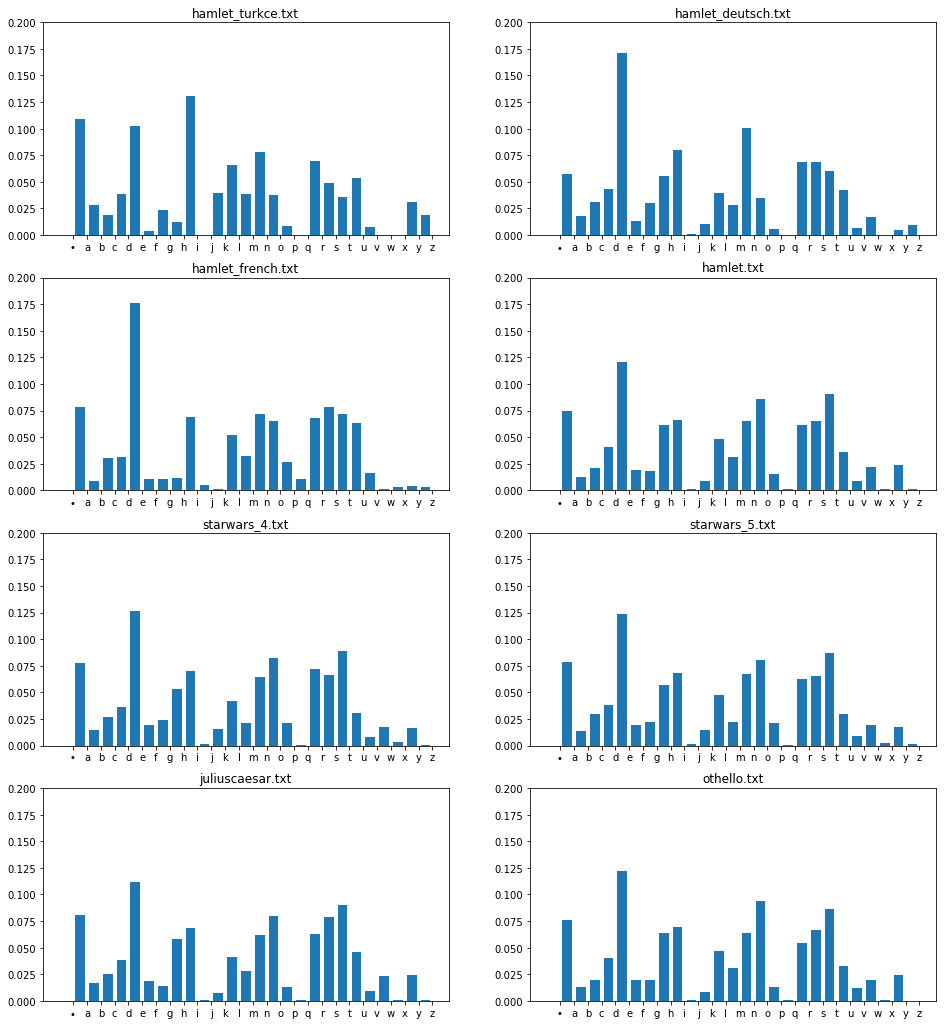

In [2]:
local = 'file:///Users/cemgil/Dropbox/Public/swe546/data/'
#local = 'https://dl.dropboxusercontent.com/u/9787379/swe546/data/'
#files = ['starwars_4.txt', 'starwars_5.txt', 'starwars_6.txt', 'hamlet.txt', 'hamlet_deutsch.txt', 'hamlet_french.txt', 'juliuscaesar.txt','othello.txt', 'sonnets.txt', 'antoniusandcleopatra.txt']
files = ['hamlet_turkce.txt','hamlet_deutsch.txt', 'hamlet_french.txt', 'hamlet.txt','starwars_4.txt', 'starwars_5.txt','juliuscaesar.txt','othello.txt']

plt.figure(figsize=(16,18))

i = 0
for f in files:
    url = local+f
    data = urlopen(url) 
    #D, DD, alphabet = count_transitions(data, my_alphabet, {})
    D, DD, alphabet = count_transitions(data, ascii_alphabet, my2ascii_table)
    #D, DD, alphabet = count_transitions(data, tr_alphabet, my2tr_table)
    M = len(alphabet)
    # Ignore space, space transitions
    DD[0,0] = 1
    
    i+=1
    plt.subplot(len(files)/2,2,i)
        
    S = np.sum(DD,axis=0)
    #Subpress spaces
    S[0] = 0
    S = S/np.sum(S)

    plt.bar(np.arange(M)-0.5, S, width=0.7)
    plt.xticks(range(M), alphabet)
    plt.gca().set_ylim((0,0.2))
    plt.title(f)

plt.show()


## Counting Bigrams

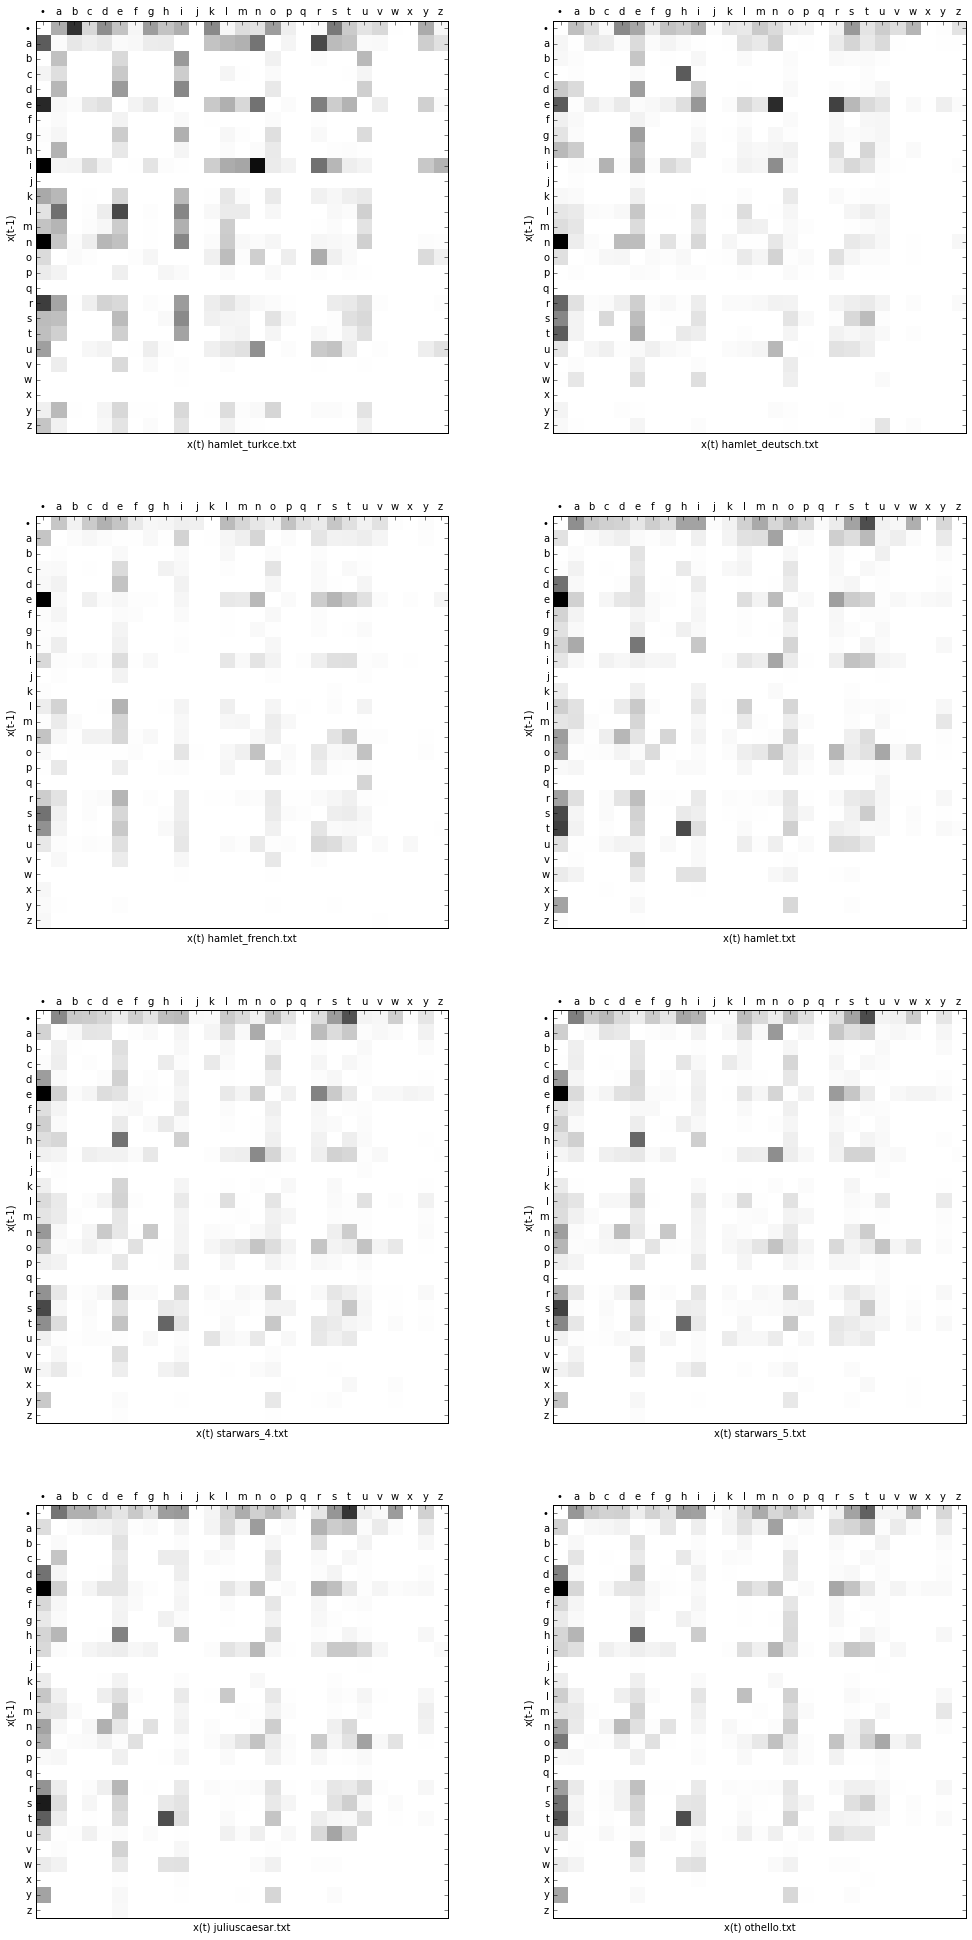

In [10]:
local = 'file:///Users/cemgil/Dropbox/Public/swe546/data/'
#local = 'https://dl.dropboxusercontent.com/u/9787379/swe546/data/'

#files = ['starwars_4.txt', 'starwars_5.txt', 'starwars_6.txt', 'hamlet.txt', 'hamlet_deutsch.txt', 'hamlet_french.txt', 'juliuscaesar.txt','othello.txt', 'sonnets.txt', 'antoniusandcleopatra.txt']
files = ['hamlet_turkce.txt','hamlet_deutsch.txt', 'hamlet_french.txt', 'hamlet.txt','starwars_4.txt', 'starwars_5.txt','juliuscaesar.txt','othello.txt']

plt.figure(figsize=(17,2*17))

i = 0
for f in files:
    url = local+f
    data = urlopen(url) 
    #D, DD, alphabet = count_transitions(data, my_alphabet, {})
    D, DD, alphabet = count_transitions(data, ascii_alphabet, my2ascii_table)
    #D, DD, alphabet = count_transitions(data, tr_alphabet, my2tr_table)
    M = len(alphabet)
    DD[0,0] = 1
    
    i+=1
    plt.subplot(len(files)/2,2,i)
    plt.imshow(DD, interpolation='nearest', vmin=0,cmap='gray_r')
    plt.xticks(range(M), alphabet)
    plt.xlabel('x(t)')
    plt.yticks(range(M), alphabet)
    plt.ylabel('x(t-1)')
    ax = plt.gca()
    ax.xaxis.tick_top()
    #ax.set_title(f, va='bottom')
    plt.xlabel('x(t) '+f)
    

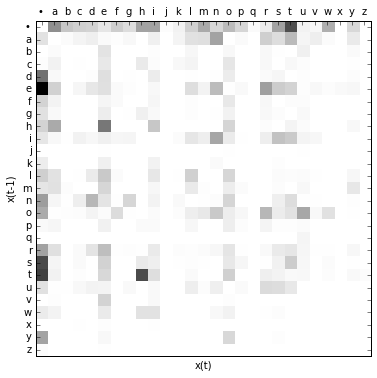

In [17]:
plt.figure(figsize=(6,6))

f = 'hamlet.txt'

url = local+f
data = urlopen(url) 
#D, DD, alphabet = count_transitions(data, my_alphabet, {})
D, DD, alphabet = count_transitions(data, ascii_alphabet, my2ascii_table)
#D, DD, alphabet = count_transitions(data, tr_alphabet, my2tr_table)
M = len(alphabet)
DD[0,0] = 1

plt.imshow(DD, interpolation='nearest', vmin=0,cmap='gray_r')
plt.xticks(range(M), alphabet)
plt.xlabel('x(t)')
plt.yticks(range(M), alphabet)
plt.ylabel('x(t-1)')
ax = plt.gca()
ax.xaxis.tick_top()
#ax.set_title(f, va='bottom')
plt.xlabel('x(t)')

plt.savefig('transition.pdf',bbox_inches='tight')
plt.show()

### Normalized probability table of $p(x_t|x_{t-1})$

In [8]:

def normalize(A, axis=0):
    Z = np.sum(A, axis=axis,keepdims=True)
    idx = np.where(Z == 0)
    Z[idx] = 1
    return A/Z

local = 'file:///Users/cemgil/Dropbox/Public/swe546/data/'
#local = 'https://dl.dropboxusercontent.com/u/9787379/swe546/data/'

file = 'hamlet_turkce.txt'
data = urlopen(local+file) 
D, DD, alphabet = count_transitions(data, tr_alphabet, my2tr_table)


plt.figure(figsize=(9,9))

T = normalize(DD, axis=0)


plt.imshow(T, interpolation='nearest', vmin=0)
plt.xticks(range(M), alphabet)
plt.yticks(range(M), alphabet)
plt.gca().xaxis.tick_top()

plt.show()

NameError: name 'urlopen' is not defined

### Is Markov(0), Markov(1) or Markov(2) a better model for English letters in plain text ?

## Counting Words

In [3]:
def int_to_roman(input):
    """
    Convert an integer to Roman numerals.

    Examples:
    >>> int_to_roman(0)
    Traceback (most recent call last):
    ValueError: Argument must be between 1 and 3999

    >>> int_to_roman(-1)
    Traceback (most recent call last):
    ValueError: Argument must be between 1 and 3999

    >>> int_to_roman(1.5)
    Traceback (most recent call last):
    TypeError: expected integer, got <type 'float'>

    >>> for i in range(1, 21): print int_to_roman(i)
    ...
    I
    II
    III
    IV
    V
    VI
    VII
    VIII
    IX
    X
    XI
    XII
    XIII
    XIV
    XV
    XVI
    XVII
    XVIII
    XIX
    XX
    >>> print int_to_roman(2000)
    MM
    >>> print int_to_roman(1999)
    MCMXCIX
    """
    ints = (1000, 900,  500, 400, 100,  90, 50,  40, 10,  9,   5,  4,   1)
    nums = ('M',  'CM', 'D', 'CD','C', 'XC','L','XL','X','IX','V','IV','I')
    result = ""
    for i in range(len(ints)):
        count = int(input / ints[i])
        result += nums[i] * count
        input -= ints[i] * count
    return result



def roman_to_int(input):
    """
    Convert a roman numeral to an integer.

    >>> r = range(1, 4000)
    >>> nums = [int_to_roman(i) for i in r]
    >>> ints = [roman_to_int(n) for n in nums]
    >>> print r == ints
    1

    >>> roman_to_int('VVVIV')
    Traceback (most recent call last):
    ...
    ValueError: input is not a valid roman numeral: VVVIV
    >>> roman_to_int(1)
    Traceback (most recent call last):
    ...
    TypeError: expected string, got <type 'int'>
    >>> roman_to_int('a')
    Traceback (most recent call last):
    ...
    ValueError: input is not a valid roman numeral: A
    >>> roman_to_int('IL')
    Traceback (most recent call last):
    ...
    ValueError: input is not a valid roman numeral: IL
    """
    if type(input) != type(""):
        raise TypeError("expected string, got %s" % type(input))
    input = input.upper()
    nums = ['M', 'D', 'C', 'L', 'X', 'V', 'I']
    ints = [1000, 500, 100, 50,  10,  5,   1]
    places = []
    for c in input:
        if not c in nums:
            raise ValueError("input is not a valid roman numeral: %s" % input)
    for i in range(len(input)):
        c = input[i]
        value = ints[nums.index(c)]
        # If the next place holds a larger number, this value is negative.
        try:
            nextvalue = ints[nums.index(input[i +1])]
            if nextvalue > value:
                value *= -1
        except IndexError:
        # there is no next place.
            pass
        places.append(value)
    sum = 0
    for n in places: sum += n
    # Easiest test for validity...
    if int_to_roman(sum) == input:
        return sum
    else:
        raise ValueError('input is not a valid roman numeral: %s' % input)

In [18]:
from collections import defaultdict
from urllib.request import urlopen
import string
import numpy as np
import matplotlib.pyplot as plt


local = 'file:///Users/cemgil/Dropbox/Public/swe546/data/'
#local = 'https://dl.dropboxusercontent.com/u/9787379/swe546/data/'
#files = ['starwars_4.txt', 'starwars_5.txt', 'starwars_6.txt', 'hamlet.txt', 'hamlet_deutsch.txt', 'hamlet_french.txt', 'juliuscaesar.txt','othello.txt', 'sonnets.txt', 'antoniusandcleopatra.txt']
files = ['hamlet.txt','starwars_4.txt', 'starwars_5.txt','juliuscaesar.txt','othello.txt']

i = 0
f = files[1]
url = local+f
fp = urlopen(url) 

i = 0

dic = {}

tb = str.maketrans(".\t\n\r,,;-","        ", '0123456789!"\#$%&()*/:<=>?@[\\]^_`{|}~+')

for line in fp:
    
    for w in line.decode().translate(tb).lower().split():
        key = w
        dic[key] = dic.setdefault(key,0) + 1
        

fp.close()

for k in sorted(dic.keys()):
    print(k,dic[k])

'cause 1
'em 3
'nother 1
a 780
aaah 1
abandoned 1
abide 1
abilities 1
ability 1
ablaze 1
able 10
aboard 9
about 79
above 11
absolutely 1
abyss 4
academy 6
accelerate 1
accelerates 1
accelerator 1
according 1
account 1
accurate 1
across 34
act 1
action 2
actions 1
activates 1
activity 4
actually 1
adam 1
added 1
additional 2
addresses 1
addressing 2
adequate 1
adjust 1
adjusting 1
adjustments 3
adjusts 18
admiral 2
adobe 1
advance 2
advances 2
advancing 2
advantage 1
adventurer 3
adventurers 1
adventures 1
advertisingpublicity 1
advice 1
afraid 7
aft 1
after 11
afterburners 1
afternoon 2
again 8
against 21
age 2
agents 1
aghast 1
agility 1
agitated 1
ago 3
agony 1
agree 1
agreement 5
agrees 2
ah 1
ahead 3
aide 2
aided 1
aides 1
aim 7
aimed 2
aiming 1
aims 5
ain't 6
air 10
aisle 1
al 1
alarm 4
alarmed 1
alarms 2
alcove 4
alderaan 25
alec 2
alert 6
alerted 1
alex 1
alexander 1
alien 5
alike 1
alive 3
all 94
alley 1
alleyway 6
alliance 3
allow 3
allowed 1
ally 1
almost 15
alone 5
along 16


crumbles 1
crumbling 1
crusade 1
crush 1
crushing 2
crying 1
cuba 1
cuffs 3
cullip 1
cunning 1
curdling 1
curious 1
curls 1
curse 1
curved 1
cushing 2
custodian 1
customs 1
cut 13
cutting 1
cyborg 1
d 3
dalva 1
damage 2
damaged 3
damages 1
damn 1
damned 1
dan 2
dance 1
danger 2
dangerous 7
daniels 2
dantooine 4
dare 1
dark 18
darkening 1
darklighter 1
darkly 5
darkness 2
darth 43
darts 2
dash 1
dashed 1
dashing 1
data 5
david 9
davidson 1
day 17
daze 1
dazzling 2
de 1
deactivate 1
deactivated 1
dead 13
deadly 4
deak 2
deak's 1
deal 1
dealer 1
death 230
deathly 1
debris 4
debts 1
deceive 1
deck 4
deco 1
decorator 1
decoy 1
decrease 1
deep 7
defense 2
defenses 1
defensive 2
defiance 1
deflect 2
deflection 1
deflector 4
deflectors 2
deftly 1
degrees 1
deliberately 1
delicate 1
delivered 2
deluxe 1
demand 1
demonstrate 2
demonstrated 1
demonstration 1
den 1
denham 1
dennis 2
dense 3
dented 3
depart 1
department 1
departure 1
depths 1
der 1
derek 1
descent 1
describing 1
desert 16
deserted 

joint 2
joints 2
jon 2
jonathan 1
jones 2
joseph 1
joy 2
joyous 1
jr 1
jug 1
jump 8
jumps 8
jundland 2
jungle 6
junk 3
just 44
justice 1
jutting 1
karen 1
katz 1
keep 11
keeps 1
kenneth 2
kenny 2
kenobi 28
kenobi's 1
kept 2
kessel 2
keys 1
kick 3
kid 15
kidding 2
kids 1
kill 3
killed 4
killer 1
killing 1
kim 1
kind 5
kiss 1
kisses 1
kitchen 3
kitchens 1
klaff 1
kline 1
kneel 1
knew 6
knicking 1
knight 5
knights 3
knock 1
knocked 2
knocks 2
know 39
knowledgeable 1
known 2
knows 2
koehler 1
kuran 1
kurtz 1
lack 1
lad 1
ladder 3
ladders 1
lamb 1
land 1
landing 1
landlocked 1
landscape 2
landspeeder 13
language 5
lanky 2
lap 1
large 30
larger 3
larry 1
lars 10
laser 55
laserbeams 2
laserblast 1
laserblasts 2
laserbolt 5
laserbolts 18
laserfire 28
lasers 6
last 18
lasted 1
latch 1
latches 1
late 4
lateral 1
laugh 2
laughing 7
laughs 4
laughter 2
laws 1
lawson 1
le 1
lead 3
leader 93
leader's 44
leaders 1
leading 5
leads 3
leak 2
lean 1
leaning 1
leans 3
learn 4
learned 1
learner 1
leash 1
l

several 33
sexy 1
shabby 1
shade 1
shadow 1
shadows 8
shaft 7
shaggy 2
shake 4
shakes 12
shaking 6
shall 2
shape 1
shaped 2
shapes 1
sharman 1
sharp 5
shattered 1
shaw 1
she 36
she'll 4
she's 11
sheepish 1
sheepishly 3
shelagh 1
shell 1
shepherd 1
shield 3
shielded 2
shields 5
shined 1
ship 104
ship's 4
shipments 1
ships 20
shock 2
shoo 1
shoot 3
shooting 3
shoots 7
short 16
shot 7
shots 2
should 15
shoulder 8
shouldered 1
shoulders 4
shouldn't 1
shourt 2
shouting 1
shove 1
shoved 1
shoves 1
show 3
shower 3
showing 2
shows 2
shriek 1
shrieking 1
shrouded 5
shrugs 3
shudder 2
shudders 4
shut 16
shutting 3
shuttle 1
side 50
sides 5
sigh 1
sighing 1
sight 14
sights 2
sign 4
signal 4
signaled 1
signalman 1
signals 2
signed 1
signing 1
silenced 1
silently 2
silhouetted 2
silver 3
similar 3
simple 3
simpletons 1
simply 4
since 6
sinden 1
single 2
sinister 4
sink 1
sips 1
sir 43
sirens 1
sister 2
sit 7
sith 5
sits 12
sitting 5
situation 4
six 6
sixteen 3
sixty 1
size 6
sizes 1
sizing 1
skepti

In [4]:
sw = './data/books-eng/stopwords.txt'

f = open(sw,'r')
stopwords = []
for w in f:
    stopwords.append(w.strip())
    
for i in range(300):
    stopwords.append(int_to_roman(i).lower())

In [5]:
stopwords

['.',
 '-',
 '!',
 ':',
 'rt',
 'retweet',
 '&',
 '"',
 '""',
 ',',
 '(',
 ')',
 'a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes

In [16]:
from collections import defaultdict
from urllib.request import urlopen
import string
import numpy as np
import matplotlib.pyplot as plt


local = 'file:///Users/cemgil/Dropbox/Public/swe546/data/'
#local = 'https://dl.dropboxusercontent.com/u/9787379/swe546/data/'
#files = ['starwars_4.txt', 'starwars_5.txt', 'starwars_6.txt', 'hamlet.txt', 'hamlet_deutsch.txt', 'hamlet_french.txt', 'juliuscaesar.txt','othello.txt', 'sonnets.txt', 'antoniusandcleopatra.txt']
#files = ['war_and_peace.txt','juliuscaesar.txt','macbeth.txt',  'hamlet.txt','othello.txt','sonnets.txt', 'romeoandjuliet.txt']
files = ['juliuscaesar.txt','antoniusandcleopatra.txt', 'hamlet.txt','romeoandjuliet.txt', 'othello.txt','sonnets.txt','starwars_4.txt', 'starwars_5.txt','starwars_6.txt']

tokens = {}
dic = {}
tb = str.maketrans(".\t\n\r,,;-","        ", '0123456789!"\'\#$%&()*/:<=>?@[\\]^_`{|}~+')

for file_index in range(len(files)):
    f = files[file_index]
    url = local+f
    fp = urlopen(url) 

    for line in fp:
        for w in line.decode().translate(tb).lower().split():
            key = w.strip()
            if key not in stopwords:
                dic[key] = dic.setdefault(key,len(dic))
                key2 = (dic[key],file_index)
                tokens[key2] = tokens.setdefault(key2, 0) + 1
            

    fp.close()

inv_dic = {dic[k]: k for k in dic.keys()}
len(dic)

14876

In [8]:
for i in range(len(inv_dic)):
    print(i,inv_dic[i])

0 project
1 gutenberg
2 ebook
3 war
4 peace
5 leo
6 tolstoy
7 cost
8 restrictions
9 whatsoever
10 copy
11 give
12 terms
13 license
14 included
15 online
16 www
17 org
18 title
19 author
20 posting
21 date
22 january
23 release
24 april
25 language
26 english
27 start
28 anonymous
29 volunteer
30 tolstoytolstoi
31 book
32 chapter
33 prince
34 genoa
35 lucca
36 family
37 estates
38 buonapartes
39 warn
40 dont
41 means
42 defend
43 infamies
44 horrors
45 perpetrated
46 antichrist
47 longer
48 friend
49 faithful
50 slave
51 call
52 frightened
53 sit
54 news
55 july
56 speaker
57 anna
58 pavlovna
59 scherer
60 maid
61 honor
62 favorite
63 empress
64 marya
65 fedorovna
66 words
67 greeted
68 vasili
69 kuragin
70 man
71 high
72 rank
73 importance
74 arrive
75 reception
76 cough
77 days
78 suffering
79 la
80 grippe
81 word
82 st
83 petersburg
84 elite
85 invitations
86 exception
87 written
88 french
89 delivered
90 scarlet
91 liveried
92 footman
93 morning
94 ran
95 count
96 prospect
97 spendi

946 lovely
947 trace
948 coquetry
949 appeared
950 unquestionable
951 victorious
952 diminish
953 effect
954 dropped
955 startled
956 extraordinary
957 seat
958 opposite
959 beamed
960 madame
961 doubt
962 ability
963 audience
964 smilingly
965 inclining
966 rested
967 bare
968 unnecessary
969 waited
970 told
971 upright
972 glancing
973 altered
974 shape
975 pressure
976 readjusted
977 diamond
978 necklace
979 smoothed
980 folds
981 produced
982 glanced
983 adopted
984 relapsed
985 radiant
986 wait
987 fetch
988 merrily
989 joined
990 moving
991 chair
992 charmant
993 surprising
994 resemblance
995 fact
996 exceedingly
997 ugly
998 sisters
999 lit
1000 joyous
1001 satisfied
1002 classic
1003 dulled
1004 imbecility
1005 sullen
1006 confidence
1007 body
1008 weak
1009 nose
1010 puckered
1011 vacant
1012 wearied
1013 grimace
1014 legs
1015 fell
1016 unnatural
1017 positions
1018 ghost
1019 hastily
1020 adjusting
1021 lorgnette
1022 instrument
1023 fellow
1024 astonished
1025 narrator
102

2059 sharp
2060 wedge
2061 firmly
2062 distinct
2063 smiles
2064 corners
2065 resolute
2066 insolent
2067 intelligence
2068 spent
2069 tens
2070 thousands
2071 footing
2072 respected
2073 play
2074 games
2075 won
2076 clearheadedness
2077 rakes
2078 scapegraces
2079 frame
2080 sill
2081 forced
2082 flurried
2083 intimidated
2084 directions
2085 shouts
2086 gentlemen
2087 swaggering
2088 strode
2089 smash
2090 tugged
2091 move
2092 smashed
2093 pane
2094 hercules
2095 crossbeam
2096 wrenched
2097 oak
2098 crash
2099 theyll
2100 englishman
2101 bragging
2102 eh
2103 rate
2104 sky
2105 dawn
2106 merging
2107 afterglow
2108 sunset
2109 visible
2110 jumped
2111 standing
2112 fifty
2113 imperials
2114 spot
2115 stooped
2116 pointed
2117 sloping
2118 buttons
2119 wager
2120 hammering
2121 attract
2122 pay
2123 indication
2124 intended
2125 accept
2126 challenge
2127 nodding
2128 translating
2129 dolokhovs
2130 lad
2131 hussar
2132 losing
2133 climbed
2134 stones
2135 pavement
2136 shut
2137 a

3429 sally
3430 care
3431 boldly
3432 saucy
3433 gaiety
3434 doubled
3435 ice
3436 pudding
3437 braved
3438 cream
3439 carrot
3440 ices
3441 screamed
3442 incredible
3443 boldness
3444 smartness
3445 dared
3446 desisted
3447 pineapple
3448 champagne
3449 seats
3450 clink
3451 redder
3452 sets
3453 library
3454 fanwise
3455 nap
3456 instigation
3457 clavichord
3458 harp
3459 request
3460 variations
3461 begging
3462 noted
3463 musical
3464 talent
3465 sing
3466 treated
3467 brook
3468 sonyas
3469 chest
3470 passage
3471 mourning
3472 female
3473 downward
3474 nurses
3475 feather
3476 top
3477 crumpling
3478 gauzy
3479 pink
3480 sobbing
3481 convulsively
3482 shiver
3483 drooped
3484 oo
3485 widened
3486 wail
3487 baby
3488 lift
3489 deeper
3490 striped
3491 hugging
3492 weeks
3493 paper
3494 envious
3495 gaining
3496 difficulties
3497 metropolitan
3498 spoiling
3499 heartless
3500 ungrateful
3501 witness
3502 willingly
3503 sacrifice
3504 consoling
3505 copied
3506 shed
3507 sob
3508 bi

4683 mischievous
4684 playfellow
4685 indulgent
4686 comprendre
4687 cest
4688 pardonner
4689 buried
4690 resources
4691 entertaining
4692 savage
4693 likes
4694 sterne
4695 homeless
4696 reads
4697 evenings
4698 aghast
4699 harsh
4700 puzzle
4701 test
4702 trend
4703 veneration
4704 evoke
4705 contented
4706 incredulously
4707 intellect
4708 fail
4709 astray
4710 shade
4711 improvement
4712 satire
4713 bitter
4714 monk
4715 wasting
4716 banteringly
4717 ami
4718 unworthy
4719 inside
4720 guessing
4721 grandfather
4722 bless
4723 icon
4724 weigh
4725 hundredweight
4726 pained
4727 repented
4728 trembling
4729 oval
4730 wrought
4731 rays
4732 generous
4733 harshly
4734 complained
4735 masha
4736 blamed
4737 forebodings
4738 confinement
4739 dreaded
4740 reproached
4741 unaccustomed
4742 darkness
4743 wake
4744 petrushka
4745 wing
4746 artless
4747 secluded
4748 contempt
4749 awake
4750 restraint
4751 zubova
4752 cheat
4753 ha
4754 reminiscences
4755 coach
4756 autumn
4757 pole
4758 lant

5932 bwicks
5933 attacks
5934 hacking
5935 shooting
5936 target
5937 promoted
5938 sublieutenancy
5939 triumphantly
5940 losses
5941 trifle
5942 phrase
5943 distinctness
5944 pursued
5945 encountering
5946 population
5947 unfriendly
5948 supplies
5949 foreseen
5950 enable
5951 retreat
5952 lambach
5953 amstetten
5954 melk
5955 consequence
5956 escaped
5957 capture
5958 strategics
5959 unattainable
5960 eighth
5961 main
5962 thirtieth
5963 mortiers
5964 trophies
5965 banners
5966 fortnights
5967 repulsed
5968 clad
5969 abandoned
5970 entrusted
5971 humanity
5972 hospitals
5973 krems
5974 converted
5975 accommodate
5976 mortier
5977 spirits
5978 considerably
5979 erroneous
5980 rife
5981 attendance
5982 schmidt
5983 grazed
5984 mark
5985 threatened
5986 brunn
5987 build
5988 physical
5989 fatigue
5990 dispatches
5991 dokhturov
5992 starry
5993 snow
5994 reviewing
5995 impressions
5996 picturing
5997 pleasantly
5998 recalling
5999 chaise
6000 enjoying
6001 attain
6002 afresh
6003 reassure

7197 bill
7198 kinder
7199 intoxication
7200 grieve
7201 oppressed
7202 pitys
7203 helpless
7204 designs
7205 rogues
7206 overwhelmed
7207 purely
7208 charity
7209 propose
7210 fingering
7211 notwithstanding
7212 cooing
7213 precluding
7214 persuasion
7215 recollections
7216 ryazan
7217 require
7218 quitrent
7219 peasants
7220 gentleness
7221 numerous
7222 bewilderment
7223 attained
7224 dinners
7225 tactless
7226 unsuitable
7227 stupidest
7228 apt
7229 modesty
7230 link
7231 imposed
7232 supposition
7233 novelty
7234 potsdam
7235 pledged
7236 uphold
7237 afflicted
7238 charitable
7239 adores
7240 masterly
7241 helenes
7242 desirous
7243 coughed
7244 swallowed
7245 halting
7246 aunts
7247 vinesse
7248 miniaturist
7249 shortsighted
7250 perceive
7251 charm
7252 warmth
7253 corset
7254 garments
7255 illusion
7256 belong
7257 altar
7258 tuft
7259 steppe
7260 barrier
7261 reprehensible
7262 refitting
7263 exercising
7264 uniting
7265 mindedly
7266 excites
7267 incomplete
7268 worthlessness

8357 followers
8358 carabineers
8359 roads
8360 barely
8361 alls
8362 oneself
8363 hindering
8364 flood
8365 wretches
8366 gasped
8367 volley
8368 despairingly
8369 feebleness
8370 choking
8371 leapt
8372 aimed
8373 unceasingly
8374 distraught
8375 unarmed
8376 stab
8377 remembers
8378 stabs
8379 trailing
8380 bludgeon
8381 glide
8382 infinite
8383 dolgorukovs
8384 commence
8385 avert
8386 expressionless
8387 boyish
8388 elasticity
8389 bravest
8390 rein
8391 uvarovs
8392 volleys
8393 chase
8394 hillsides
8395 caissons
8396 sights
8397 depressing
8398 intimidating
8399 stimulated
8400 handful
8401 uhlans
8402 width
8403 trotting
8404 jingle
8405 crushed
8406 collide
8407 bowled
8408 shied
8409 extending
8410 amazed
8411 youths
8412 eighteen
8413 warlike
8414 describing
8415 discharged
8416 helmet
8417 uniformed
8418 knights
8419 traversed
8420 charged
8421 hottest
8422 issue
8423 perish
8424 foreboding
8425 evil
8426 czech
8427 traitors
8428 zum
8429 henker
8430 diese
8431 hubbub
8432 

9550 amount
9551 south
9552 attending
9553 values
9554 disagreement
9555 recurred
9556 blinked
9557 attractively
9558 reborn
9559 fatted
9560 calf
9561 sums
9562 odessa
9563 duels
9564 principals
9565 rupture
9566 extolled
9567 societys
9568 insanely
9569 cordially
9570 uncomplainingly
9571 openly
9572 priority
9573 raptures
9574 posed
9575 marat
9576 soirees
9577 foretold
9578 bloom
9579 essence
9580 selection
9581 thermometer
9582 jena
9583 auerstadt
9584 surrender
9585 fortresses
9586 diplomatists
9587 homme
9588 merite
9589 noteworthy
9590 temperature
9591 mortification
9592 alter
9593 tu
9594 las
9595 voulu
9596 dandin
9597 duly
9598 krug
9599 daffaires
9600 shitov
9601 tastes
9602 peculiarities
9603 advantageously
9604 mission
9605 conversant
9606 incomparably
9607 perseverance
9608 discovery
9609 groat
9610 despised
9611 appraising
9612 establishing
9613 accrue
9614 bases
9615 treaty
9616 continuity
9617 danish
9618 lurope
9619 urope
9620 pronunciation
9621 jamais
9622 alliee
96

10820 drawings
10821 representation
10822 transparent
10823 forsaking
10824 utterly
10825 desertest
10826 monetary
10827 comparatively
10828 mitenkas
10829 lassies
10830 provincials
10831 suppers
10832 impoverished
10833 squires
10834 peronskaya
10835 narrated
10836 episode
10837 usefulness
10838 finnish
10839 insistently
10840 lucrative
10841 skeptics
10842 stalls
10843 das
10844 soll
10845 mein
10846 weib
10847 werden
10848 livonian
10849 rent
10850 baltic
10851 nicely
10852 estimable
10853 fiancee
10854 doubling
10855 embodying
10856 joyousness
10857 resulted
10858 amounted
10859 mortgaged
10860 arrears
10861 importunity
10862 rapturously
10863 boisterous
10864 aback
10865 madcap
10866 childhoods
10867 compression
10868 amusements
10869 accidentally
10870 album
10871 allude
10872 knob
10873 cotton
10874 curlpapers
10875 prayerful
10876 dispelled
10877 chiding
10878 praying
10879 snuggling
10880 bedclothes
10881 kicking
10882 peeping
10883 sphinxes
10884 profile
10885 knuckle
10886 k

12014 tourments
12015 sombre
12016 retraite
12017 mele
12018 douceur
12019 secrete
12020 ces
12021 pleurs
12022 sens
12023 couler
12024 poisonous
12025 nourishment
12026 mingle
12027 sweetness
12028 doleful
12029 nocturnes
12030 liza
12031 penza
12032 nizhegorod
12033 disappointments
12034 adorer
12035 renouncing
12036 expiring
12037 apportioned
12038 repulsive
12039 arduous
12040 revenue
12041 inconstancy
12042 galling
12043 greedy
12044 konyusheny
12045 candidly
12046 bluntly
12047 jails
12048 prisons
12049 classes
12050 substantial
12051 appetizing
12052 newspapers
12053 knitted
12054 pulley
12055 plumper
12056 foo
12057 bonjour
12058 outdoor
12059 sniveling
12060 irina
12061 vasilevna
12062 barrels
12063 passes
12064 purchaser
12065 fix
12066 chancery
12067 scold
12068 goddaughter
12069 suppert
12070 roguet
12071 dislikes
12072 crotchety
12073 blisters
12074 reprimand
12075 quota
12076 vozdvizhenka
12077 perturbation
12078 frivolously
12079 prejudiced
12080 insuperable
12081 indulg

13162 culminate
13163 spellbound
13164 sackful
13165 bulletin
13166 lists
13167 leaflet
13168 circulation
13169 membership
13170 abolition
13171 muscovites
13172 donned
13173 patriotism
13174 abnormal
13175 limb
13176 bulk
13177 solfa
13178 exercises
13179 association
13180 obolenski
13181 kirilych
13182 levy
13183 lining
13184 chevalier
13185 georgian
13186 disappearance
13187 spyer
13188 spire
13189 reader
13190 borders
13191 despoil
13192 levies
13193 barring
13194 recoil
13195 bondage
13196 glorify
13197 vinaigrette
13198 begrudge
13199 patriot
13200 unwontedly
13201 brightens
13202 challengingly
13203 gesticulated
13204 sedateness
13205 gateway
13206 rumbling
13207 archway
13208 tradesmen
13209 lordling
13210 filthy
13211 presentable
13212 smarten
13213 bared
13214 pinched
13215 tradesmans
13216 clinching
13217 ferociously
13218 elbowing
13219 ferocious
13220 chanter
13221 warding
13222 platform
13223 temporary
13224 kvas
13225 poppyseed
13226 goods
13227 rescued
13228 functionary

14322 humorist
14323 foxes
14324 gruel
14325 crows
14326 thundercloud
14327 streamlet
14328 drum
14329 scrupulously
14330 gasp
14331 crumbling
14332 concussion
14333 tingle
14334 charred
14335 dangling
14336 fragments
14337 bayoneted
14338 tighter
14339 claimed
14340 feat
14341 aimlessly
14342 seething
14343 demonstration
14344 collision
14345 crow
14346 glint
14347 circlet
14348 maddened
14349 collided
14350 retaken
14351 skirmish
14352 recaptured
14353 untrustworthy
14354 partially
14355 disablement
14356 located
14357 zone
14358 promptings
14359 mobs
14360 decreased
14361 reinforcements
14362 chessboard
14363 unconnected
14364 berthiers
14365 lathering
14366 gosling
14367 claparedes
14368 claparede
14369 inconvenience
14370 friant
14371 hinders
14372 hellish
14373 campstool
14374 fasted
14375 negation
14376 jocularity
14377 recklessly
14378 courte
14379 energique
14380 supernaturally
14381 impotent
14382 unfailingly
14383 disorganization
14384 eagles
14385 lodi
14386 marengo
14387 w

15575 pegs
15576 unwrapped
15577 potato
15578 clasp
15579 tss
15580 tt
15581 platon
15582 surname
15583 karataev
15584 maggot
15585 gnaws
15586 dies
15587 housewife
15588 earning
15589 wages
15590 whichever
15591 grandchildren
15592 dragnet
15593 bulges
15594 frola
15595 lavra
15596 loaf
15597 cracks
15598 platons
15599 semicircles
15600 suppleness
15601 directness
15602 appositeness
15603 imprisonment
15604 sewed
15605 planed
15606 stiffness
15607 indecent
15608 saws
15609 context
15610 appositely
15611 adorning
15612 endearment
15613 commonest
15614 karataevs
15615 fitness
15616 platosha
15617 chaffed
15618 errands
15619 exhales
15620 dissuade
15621 equipages
15622 semiopen
15623 roundabout
15624 lipetsk
15625 shuya
15626 obtainable
15627 daunted
15628 integral
15629 preoccupations
15630 bronnikovs
15631 volga
15632 clattered
15633 connais
15634 depuis
15635 longtemps
15636 caressed
15637 groove
15638 buoyant
15639 penetrated
15640 gangrene
15641 fester
15642 festering
15643 divan
15

16720 perpetuate
16721 pistil
16722 fertilizes
16723 helps
16724 processes
16725 accessible
16726 enterprising
16727 infectious
16728 rented
16729 remorselessly
16730 contracting
16731 unpaid
16732 remainder
16733 abhorrence
16734 vrazhek
16735 whims
16736 irredeemably
16737 incurred
16738 uncomplaining
16739 civilities
16740 fills
16741 misplaced
16742 exterior
16743 farmer
16744 theoretical
16745 treatises
16746 nitrogen
16747 oxygen
16748 manures
16749 plows
16750 agent
16751 unerringly
16752 bailiff
16753 analyzing
16754 properties
16755 debit
16756 divide
16757 lazy
16758 sown
16759 harvested
16760 laxity
16761 vexations
16762 thrifty
16763 ermishin
16764 thirsty
16765 gentian
16766 fathomed
16767 fairness
16768 fruitful
16769 devoutly
16770 trifled
16771 dishonesty
16772 irregularities
16773 sentimentality
16774 cameo
16775 laocoons
16776 clench
16777 twelvemonth
16778 treasures
16779 commending
16780 lacks
16781 sterile
16782 strawberry
16783 blossoms
16784 rebuilt
16785 straite

17846 spaniel
17847 fawning
17848 cur
17849 repealing
17850 banishd
17851 repeal
17852 enfranchisement
17853 fixd
17854 skies
17855 unnumberd
17856 furnishd
17857 unassailable
17858 unshaked
17859 olympus
17860 bootless
17861 proclaim
17862 pulpits
17863 affrighted
17864 pulpit
17865 doers
17866 doomsday
17867 abridged
17868 besmear
17869 antonys
17870 honourd
17871 hazards
17872 untrod
17873 depart
17874 untouchd
17875 misgiving
17876 shrewdly
17877 glories
17878 purpled
17879 fulfil
17880 leaden
17881 disposing
17882 dignities
17883 marcus
17884 flatterer
17885 anthony
17886 corse
17887 julius
17888 bayd
17889 signd
17890 crimsond
17891 lethe
17892 prickd
17893 protest
17894 rites
17895 dot
17896 costly
17897 prophesy
17898 cumber
17899 quarterd
17900 confines
17901 havoc
17902 burial
17903 octavius
17904 beads
17905 oration
17906 forum
17907 extenuated
17908 offences
17909 enforced
17910 mourned
17911 commonwealth
17912 clamours
17913 allowd
17914 beholding
17915 twere
17916 blest
1

19201 ballad
19202 comedians
19203 extemporally
19204 attires
19205 chare
19206 wherefores
19207 planet
19208 worm
19209 rememberest
19210 fallible
19211 worms
19212 heeded
19213 whoreson
19214 mar
19215 forsooth
19216 longings
19217 juice
19218 grape
19219 aspic
19220 tellst
19221 asp
19222 intrinsicate
19223 untie
19224 unpolicied
19225 eastern
19226 sucks
19227 balm
19228 lass
19229 unparalleld
19230 soughtst
19231 augurer
19232 levelld
19233 trimming
19234 diadem
19235 tremblingly
19236 aspics
19237 fig
19238 caves
19239 hamlet
19240 denmark
19241 dramatis
19242 personae
19243 polonius
19244 horatio
19245 laertes
19246 lucianus
19247 voltimand
19248 cornelius
19249 rosencrantz
19250 guildenstern
19251 osric
19252 bernardo
19253 francisco
19254 reynaldo
19255 diggers
19256 fortinbras
19257 norway
19258 gertrude
19259 ophelia
19260 sailors
19261 hamlets
19262 elsinore
19263 liegemen
19264 dane
19265 holla
19266 tush
19267 assail
19268 illume
19269 harrows
19270 usurpst
19271 stalks
1

20389 imputation
20390 meed
20391 unfellowed
20392 barbary
20393 imponed
20394 poniards
20395 assigns
20396 hangers
20397 edified
20398 margent
20399 lapwing
20400 bevy
20401 dressy
20402 dotes
20403 yesty
20404 winnowed
20405 whensoever
20406 instructs
20407 augury
20408 pardont
20409 punishd
20410 denies
20411 disclaiming
20412 reconcilement
20413 ungored
20414 darkest
20415 betterd
20416 successive
20417 cannoneer
20418 dunks
20419 thinkt
20420 dally
20421 scuffling
20422 woodcock
20423 springe
20424 envenomd
20425 potion
20426 livest
20427 aright
20428 felicity
20429 occurrents
20430 solicited
20431 flights
20432 cell
20433 bloodily
20434 fulfilld
20435 unknowing
20436 carnal
20437 slaughters
20438 upshot
20439 inventors
20440 royally
20441 verona
20442 misadventured
20443 overthrows
20444 continuance
20445 traffic
20446 sampson
20447 capulet
20448 bucklers
20449 coals
20450 colliers
20451 montague
20452 runnst
20453 montagues
20454 maidenheads
20455 abraham
20456 balthasar
20457 k

21611 fraught
21612 pontic
21613 icy
21614 propontic
21615 hellespont
21616 lewd
21617 minx
21618 catechise
21619 crusadoes
21620 dissemble
21621 fruitfulness
21622 sequester
21623 castigation
21624 wive
21625 loset
21626 sibyl
21627 numberd
21628 sewd
21629 skilful
21630 conserved
21631 veritable
21632 seent
21633 startingly
21634 fetcht
21635 hungerly
21636 belch
21637 delayd
21638 futurity
21639 advocation
21640 alterd
21641 unquietness
21642 unhatchd
21643 demonstrable
21644 puddled
21645 indues
21646 observances
21647 unhandsome
21648 arraigning
21649 subornd
21650 indicted
21651 bianca
21652 pressd
21653 continuate
21654 guesses
21655 womand
21656 circumstanced
21657 unauthorized
21658 hypocrisy
21659 virtuously
21660 bestowt
21661 saidst
21662 boding
21663 blab
21664 unswear
21665 belie
21666 fulsome
21667 confessions
21668 invest
21669 shadowing
21670 credulous
21671 dames
21672 epilepsy
21673 lethargy
21674 unproper
21675 oerwhelmed
21676 unsuiting
21677 scuse
21678 encave
216

22902 gunfire
22903 gantry
22904 comlink
22905 tk
22906 stormtrooper
22907 chilling
22908 flattens
22909 removes
22910 sneaking
22911 plug
22912 punches
22913 readouts
22914 coupled
22915 terminals
22916 fossil
22917 scheduled
22918 growls
22919 binders
22920 growl
22921 elevator
22922 inconspicuous
22923 vacuum
22924 bureaucrats
22925 trio
22926 bureaucrat
22927 signaled
22928 nudges
22929 notified
22930 unfastens
22931 howls
22932 dumbfounded
22933 barrage
22934 screeching
22935 corridors
22936 leak
22937 explodes
22938 boring
22939 uncomprehending
22940 underestimate
22941 alerted
22942 grate
22943 frying
22944 chute
22945 guy
22946 sniffs
22947 oaf
22948 smokey
22949 muck
22950 hatchway
22951 ricochets
22952 dives
22953 magnetically
22954 cowering
22955 yanked
22956 surfaces
22957 membrane
22958 tentacle
22959 grab
22960 bobs
22961 trashmasher
22962 rumbles
22963 buzzer
22964 hustle
22965 plugs
22966 spew
22967 rips
22968 mashers
22969 hollering
22970 generator
22971 clacking
22972

24077 nauseating
24078 underworld
24079 blob
24080 maniacal
24081 oola
24082 dais
24083 obnoxious
24084 birdlike
24085 salacious
24086 crumb
24087 degenerates
24088 shuda
24089 skinned
24090 gangsters
24091 anaudience
24092 confrontation
24093 goodwill
24094 hardworking
24095 huttese
24096 subtitled
24097 hideously
24098 carbonized
24099 shadowy
24100 unspeakable
24101 hapless
24102 ohh
24103 ev
24104 ninedenine
24105 branding
24106 irons
24107 acquisitions
24108 cy
24109 feisty
24110 raucous
24111 sloppy
24112 smelly
24113 breasted
24114 oolas
24115 applauds
24116 leers
24117 lustful
24118 eitha
24119 chuba
24120 negatorie
24121 natoota
24122 boscka
24123 hysterically
24124 cringes
24125 wistfully
24126 gunshot
24127 offscreen
24128 debauchers
24129 boushh
24130 cloaked
24131 ubese
24132 translates
24133 detonator
24134 inventive
24135 zeebuss
24136 skiff
24137 hoots
24138 gunfighter
24139 glare
24140 arrogance
24141 toadlike
24142 flicks
24143 burps
24144 perimeter
24145 spotlighted


In [9]:
tokens[(0,1)]

KeyError: (0, 1)

In [10]:
i = 0
for k in dic.keys():
    print(k)
    i+=1
    if i>20000:
        break

project
gutenberg
ebook
war
peace
leo
tolstoy
cost
restrictions
whatsoever
copy
give
terms
license
included
online
www
org
title
author
posting
date
january
release
april
language
english
start
anonymous
volunteer
tolstoytolstoi
book
chapter
prince
genoa
lucca
family
estates
buonapartes
warn
dont
means
defend
infamies
horrors
perpetrated
antichrist
longer
friend
faithful
slave
call
frightened
sit
news
july
speaker
anna
pavlovna
scherer
maid
honor
favorite
empress
marya
fedorovna
words
greeted
vasili
kuragin
man
high
rank
importance
arrive
reception
cough
days
suffering
la
grippe
word
st
petersburg
elite
invitations
exception
written
french
delivered
scarlet
liveried
footman
morning
ran
count
prospect
spending
evening
poor
invalid
terrible
charmed
tonight
annette
heavens
virulent
attack
replied
disconcerted
entered
wearing
embroidered
court
uniform
knee
breeches
shoes
stars
breast
serene
expression
flat
face
spoke
refined
grandfathers
thought
gentle
patronizing
intonation
natural
grown


kissing
stranger
continually
sigh
newly
decorated
luxurious
dining
napkins
china
imprint
newness
households
halfway
leaned
elbows
nervous
agitation
determines
marry
advice
capable
irrevocable
mistake
wasted
trifles
future
ranged
lackey
idiot
whats
apparent
amazement
excellent
rare
safe
unmarried
mention
lolled
phrases
muscle
quivering
excitement
fire
extinguished
flashed
lifeless
impassioned
moments
morbid
irritation
worked
goal
aim
tie
chained
convict
lose
strength
weighs
torments
rooms
gossip
vanity
triviality
fit
caustic
exist
selfish
vain
trivial
colors
funny
incapable
highly
model
perfection
possessed
degree
qualities
lacked
treating
extensive
read
capacity
philosophical
meditation
addicted
regarded
simplest
relations
commendation
essential
grease
smoothly
reassuring
reflected
relaxing
careless
merry
crimson
plain
effort
havent
idea
consult
superiority
youre
youll
visiting
kuragins
sort
suits
debauchery
dissipation
comme
il
faut
wine
sharing
dissipated
planning
reform
happy
proper

temper
golden
sidelong
fun
abstemious
hobby
germans
science
strategy
collect
wits
foibles
honoring
settle
pigtail
plaited
grasping
nineteen
dozen
mikhelsons
tolstoys
simultaneous
southern
neutral
handing
articles
clothing
sweden
pomerania
unconsciously
operation
campaign
ninety
threaten
swedish
stralsund
austrians
operate
italy
land
naples
total
explanation
confined
reproachfully
interruption
malbrook
sen
va
guerre
sait
quand
reviendra
marlborough
meditatively
caprice
employers
admitted
individual
caused
distinctions
officials
selected
illustrate
equals
impressed
whit
taciturn
members
scanning
gilt
genealogical
tree
painted
artist
ruling
crown
alleged
descendant
rurik
ancestor
laughs
original
reverence
achilles
heel
indulging
criticism
contrasting
briskness
formality
shrill
courtiers
tsar
enters
sensation
ianovich
ho
rounded
hurry
mutual
chattered
retailing
sufficiently
collected
peg
hang
tactician
statesmen
babies
frenchy
successful
potemkins
oppose
puppet
pretending
ridicule
moreau
f

annettes
goings
doings
pining
pearl
city
petite
gentille
shallow
braggart
specimen
angered
revived
unsettled
justly
clashed
unthinkable
proposing
birth
unbecoming
anatoles
irritably
shameless
ignores
befriend
surveyed
eccentricities
questioning
interceded
hopes
principles
aboveboard
frankly
crafty
futility
sighted
kinsman
reasoning
magnanimous
dreams
reserved
cordial
devilish
intend
devote
seduced
sa
pauvre
yielding
seducer
calculation
guided
hears
trumpet
ulterior
spectacle
suddenness
prompt
coarsest
intimately
fearful
loves
etiquette
rebuking
nightcap
disheveled
lumps
snorting
insulted
insult
runs
fr
pacifying
undress
nightshirt
unaltered
inquisitive
emerged
couch
romance
tikhons
careful
treatment
painstaking
clenched
arithmetic
pupil
refer
disapproval
submit
dowry
bargain
maiden
lifes
fog
untrue
horrified
scream
incident
radiance
core
regretting
sensibility
snuff
positively
humbug
amelies
repents
midwinter
improved
nikolenka
wa
comforted
teatime
adroitly
gifted
shades
pricked
meal
s

comprehended
conjugal
throbbing
drawings
representation
transparent
forsaking
utterly
desertest
monetary
comparatively
mitenkas
lassies
provincials
suppers
impoverished
squires
peronskaya
narrated
episode
usefulness
finnish
insistently
lucrative
skeptics
stalls
das
soll
mein
weib
werden
livonian
rent
baltic
nicely
estimable
fiancee
doubling
embodying
joyousness
resulted
amounted
mortgaged
arrears
importunity
rapturously
boisterous
aback
madcap
childhoods
compression
amusements
accidentally
album
allude
knob
cotton
curlpapers
prayerful
dispelled
chiding
praying
snuggling
bedclothes
kicking
peeping
sphinxes
profile
knuckle
knuckles
contemplation
dating
matveich
giggler
uncommonly
swims
rides
opera
cherubini
dunyasha
mansion
quay
baize
plumed
ermine
doffed
discussions
ignatevna
piloted
provincial
taurida
ensuring
claret
gauze
bodices
befits
openwork
hairdressing
bustled
behindhand
pin
pinned
petticoat
scrutinized
pins
gossamer
mavra
thimble
shortened
airiness
filmy
pier
crawling
tack
rump

discharging
stink
paymaster
dismiss
tripped
interrogative
wisp
venomous
accurately
satisfies
mortally
unpracticed
skilled
kin
slander
accusations
adversarys
pawns
reticent
taciturnity
affording
undermine
fights
spares
muddles
clausewitz
der
krieg
muss
raum
verlegt
ansicht
kann
ich
nicht
genug
preis
geben
commend
ja
zweck
ist
nur
den
feind
schwachen
gewiss
verlust
privat
personen
achtung
nehmen
weaken
theories
eggshell
absently
chivalry
outraged
outraging
criminals
lightheartedly
faints
humbugged
plunder
cramp
westphalians
hessians
spying
encouragement
stealing
provision
craft
kills
maim
exaggerate
compassionate
incoherently
beekeeper
fettered
beausset
prefect
fabvier
madrid
compartment
grunting
pampered
delivering
exterminate
hunching
beaussets
salamanca
deplorable
fabviers
lucid
luckily
sistine
madonna
terrestrial
globe
depicting
spiking
allegory
paint
corrections
achievements
profoundly
dubiously
communicating
deckmuhl
campan
elchingen
ney
morrow
dictation
opposing
pernetti
campans
h

insensate
utilizes
prepares
stepsons
pushes
eastward
countermovement
precede
coalescence
adhesion
detest
outlawed
perceives
sail
dominion
channels
abate
eddies
floods
disagreements
anticipate
backwash
bidden
disrobe
drama
overshadowing
operated
grievance
liberalism
pacifier
mendacious
despises
ether
stung
poet
admires
sucking
chalice
pollen
perpetuate
pistil
fertilizes
helps
processes
accessible
enterprising
infectious
rented
remorselessly
contracting
unpaid
remainder
abhorrence
vrazhek
whims
irredeemably
incurred
uncomplaining
civilities
fills
misplaced
exterior
farmer
theoretical
treatises
nitrogen
oxygen
manures
plows
agent
unerringly
bailiff
analyzing
properties
debit
divide
lazy
sown
harvested
laxity
vexations
thrifty
ermishin
thirsty
gentian
fathomed
fairness
fruitful
devoutly
trifled
dishonesty
irregularities
sentimentality
cameo
laocoons
clench
twelvemonth
treasures
commending
lacks
sterile
strawberry
blossoms
rebuilt
straitened
sofas
spacious
birthdays
breakfasts
tunic
electio

crownets
rebound
smites
seleucus
kneels
frailties
bereave
thereon
scutcheons
jewels
possessd
treasurer
goest
soulless
wounding
vouchsafing
lordliness
immoment
livia
mediation
cinders
misthought
cheerd
thereto
debtor
hammers
uplift
breaths
diet
enclouded
lictors
scald
rhymers
ballad
comedians
extemporally
attires
chare
wherefores
planet
worm
rememberest
fallible
worms
heeded
whoreson
mar
forsooth
longings
juice
grape
aspic
tellst
asp
intrinsicate
untie
unpolicied
eastern
sucks
balm
lass
unparalleld
soughtst
augurer
levelld
trimming
diadem
tremblingly
aspics
fig
caves
hamlet
denmark
dramatis
personae
polonius
horatio
laertes
lucianus
voltimand
cornelius
rosencrantz
guildenstern
osric
bernardo
francisco
reynaldo
diggers
fortinbras
norway
gertrude
ophelia
sailors
hamlets
elsinore
liegemen
dane
holla
tush
assail
illume
harrows
usurpst
stalks
avouch
combated
frownd
parle
sledded
polacks
bodes
nightly
implements
shipwrights
labourer
emulate
esteemd
ratified
heraldry
lands
gaged
returnd
vanqui

In [17]:
import numpy as np

M = len(dic)
N = len(files)

X = np.zeros((M,N))

for t in tokens.keys():
    X[t[0],t[1]] = 1


In [36]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np



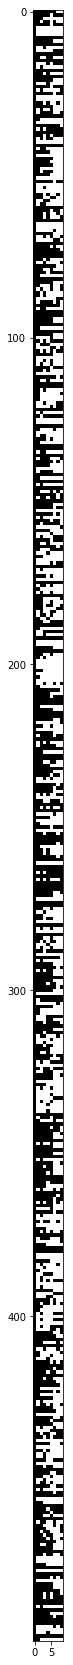

In [18]:

plt.figure(figsize=(5,30))
plt.imshow(X[0:500], interpolation='nearest',cmap='gray_r')
plt.show()

In [19]:
U, S, V = np.linalg.svd(X, full_matrices=0)

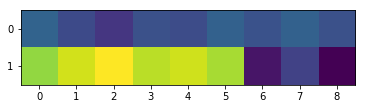

In [20]:
plt.imshow(V[0:2,:], interpolation='nearest')
plt.show()

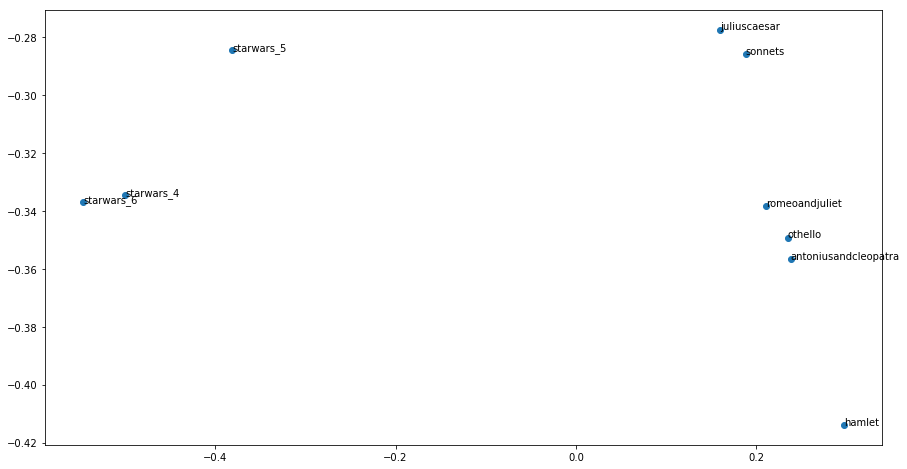

In [21]:
plt.figure(figsize=(15,8))
yy = V[0,:]
xx = V[1,:]
plt.plot(xx,yy,'o')
for i,f in enumerate(files):    
    plt.text(xx[i],yy[i], f.replace('.txt',''),)
    
plt.show()

In [106]:
A = np.random.randn(5,4)
U, S, V = np.linalg.svd(A, full_matrices=0)

print(A)
U.dot(np.diag(S).dot(V))

[[ 1.01834013  1.05454084 -0.12569335 -0.653327  ]
 [-0.45919089 -0.06093191  0.12748957 -2.08990518]
 [-0.00671268 -1.76737174 -0.66098001  1.15241306]
 [ 1.74487422  1.55593577 -1.21950539  0.64542144]
 [-0.99008952  1.15882457 -0.54206921 -0.35055043]]


array([[ 1.01834013,  1.05454084, -0.12569335, -0.653327  ],
       [-0.45919089, -0.06093191,  0.12748957, -2.08990518],
       [-0.00671268, -1.76737174, -0.66098001,  1.15241306],
       [ 1.74487422,  1.55593577, -1.21950539,  0.64542144],
       [-0.99008952,  1.15882457, -0.54206921, -0.35055043]])